## Importing the Dependencies

In [5]:
import pandas as pd
import seaborn as sns
import scipy as stats
import numpy as np
import matplotlib.pyplot as plt

# Loading the data

In [6]:
# Use a raw string or correct slashes
url = r"C:/Users/My Device/Desktop/KAIM-PRO/data/data/sierraleone-bumbuna.csv"

# If it's a CSV:
df = pd.read_csv(url)
print(df.shape)
df.head()

(525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


# 1. Summary Statistics & Missing-Value Report

In [7]:
print("An overview of the dataset: the first 5 rows")
df.head()

An overview of the dataset: the first 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [8]:
print("An overview of the dataset: the last 5 rows")
df.tail()

An overview of the dataset: the last 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525599,2022-10-30 00:00,-1.7,-0.1,-3.4,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


In [9]:
print("An overview of the dataset: a random sample of 5 rows")
df.sample(5)

An overview of the dataset: a random sample of 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
48448,2021-12-02 15:29,343.7,90.3,288.4,344.0,332.8,31.0,72.5,2.3,2.9,0.4,275.4,26.6,995,0,0.0,39.9,40.7,NaN
58895,2021-12-09 21:36,-2.4,-0.4,-2.6,0.0,0.0,25.4,90.5,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.6,25.0,NaN
428179,2022-08-23 08:20,147.7,0.9,145.1,140.4,136.4,24.5,97.6,1.2,1.9,0.5,245.3,10.6,1000,0,0.0,28.8,29.0,NaN
179814,2022-03-03 20:55,-6.1,-0.3,-5.5,0.0,0.0,27.6,76.4,2.3,5.7,1.8,251.7,4.6,997,0,0.0,26.9,27.4,NaN
456034,2022-09-11 16:35,193.2,0.7,191.5,190.6,185.3,28.4,80.7,0.4,1.4,0.6,223.1,6.1,998,0,0.0,34.7,34.8,NaN


In [10]:
print("An overview of the dataset: the shape of the dataset")
print(df.info())

An overview of the dataset: the shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600

In [11]:
print("Check for missing values:")
print(df.isna().sum())

Check for missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [12]:
print("The description of the numeric columns:")
print(df.describe())

The description of the numeric columns:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000

In [13]:
#Overview of categorical columns
print("The description of the categorical columns:")
print(df.describe(include=['object']))

The description of the categorical columns:
               Timestamp
count             525600
unique            525600
top     2021-10-30 00:01
freq                   1


In [14]:
print("The description of all columns:")
print(df.describe(include='all'))

The description of all columns:
               Timestamp            GHI            DNI            DHI  \
count             525600  525600.000000  525600.000000  525600.000000   
unique            525600            NaN            NaN            NaN   
top     2021-10-30 00:01            NaN            NaN            NaN   
freq                   1            NaN            NaN            NaN   
mean                 NaN     201.957515     116.376337     113.720571   
std                  NaN     298.495150     218.652659     158.946032   
min                  NaN     -19.500000      -7.800000     -17.900000   
25%                  NaN      -2.800000      -0.300000      -3.800000   
50%                  NaN       0.300000      -0.100000      -0.100000   
75%                  NaN     362.400000     107.000000     224.700000   
max                  NaN    1499.000000     946.000000     892.000000   

                 ModA           ModB           Tamb             RH  \
count   525600.000000

In [15]:
# Exact duplicate rows
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

# Cardinality (uniqueness) for categoricals
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: df[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)


Duplicate rows: 0
Cardinality (categoricals): {'Timestamp': 525600}


## Univariate Analysis

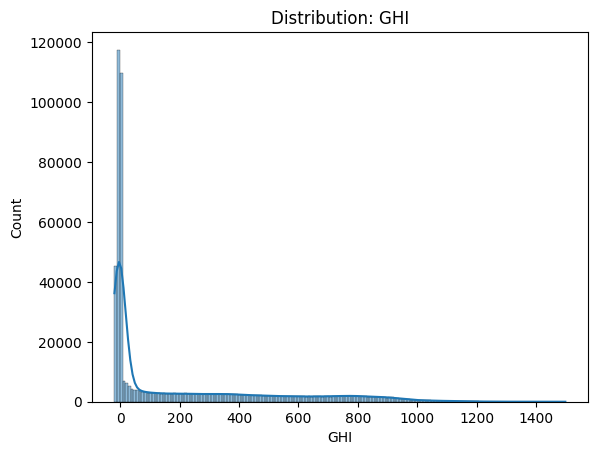

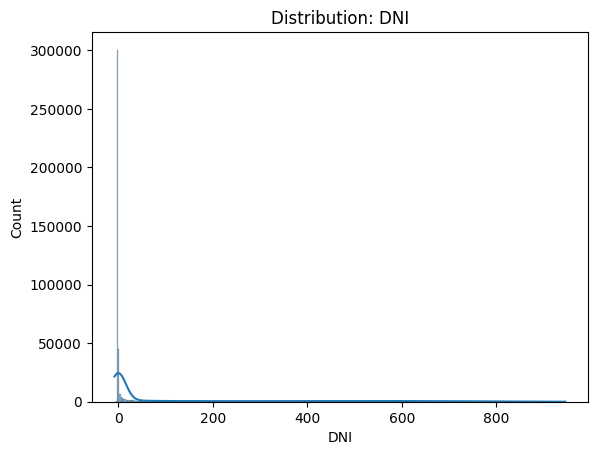

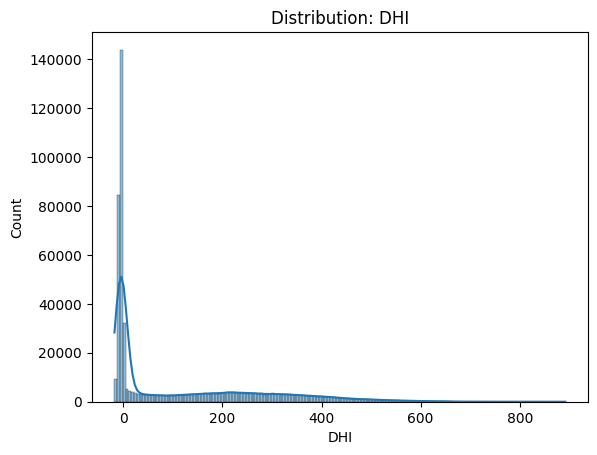

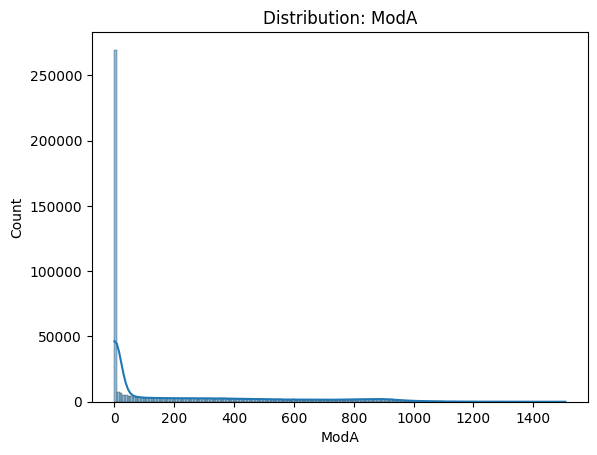

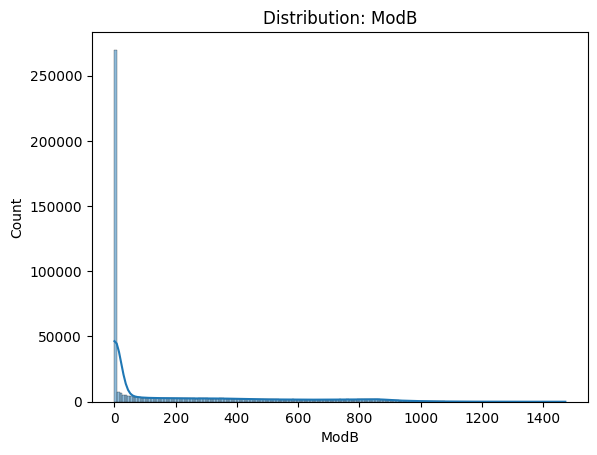

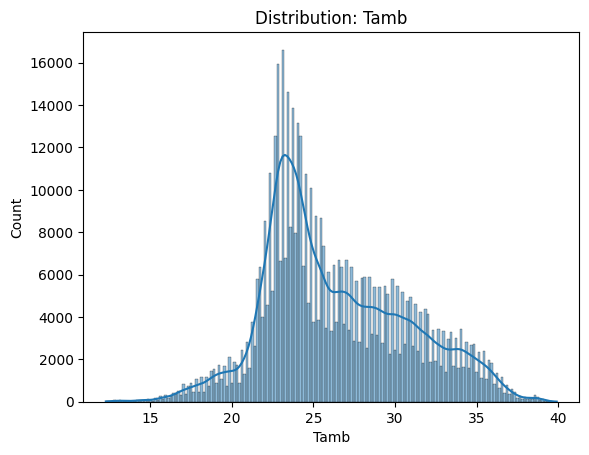

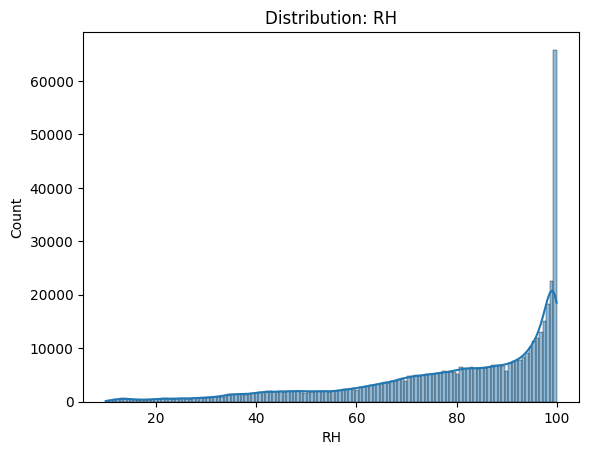

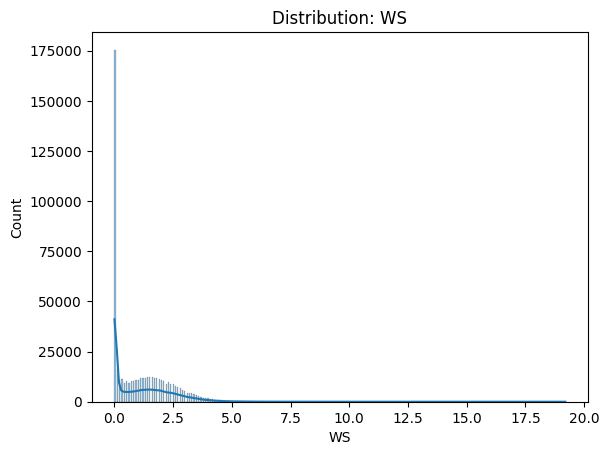

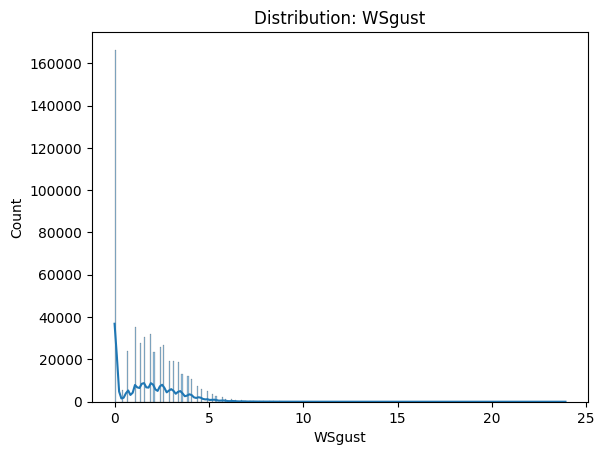

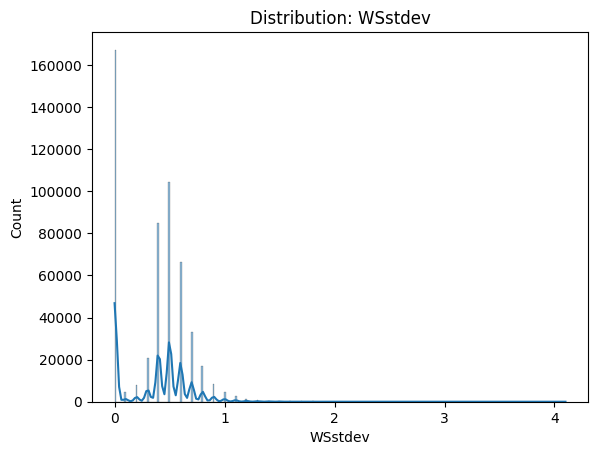

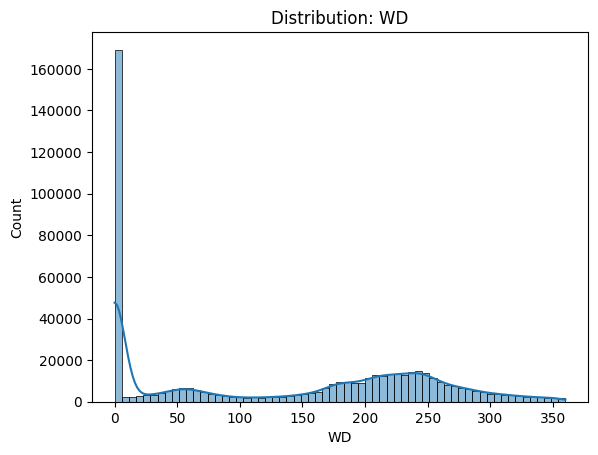

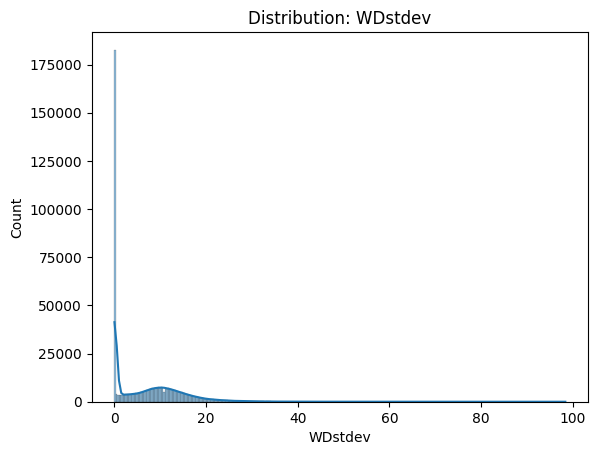

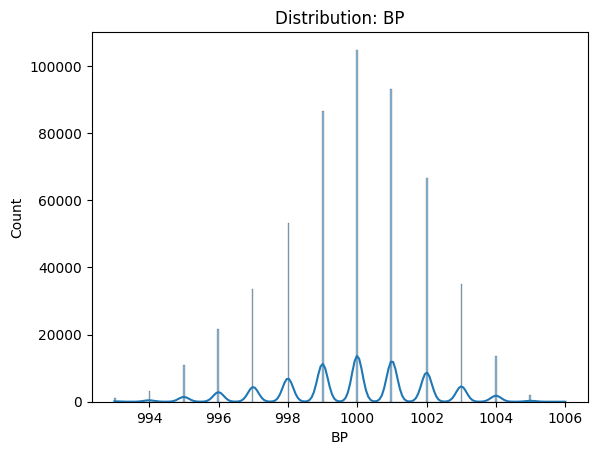

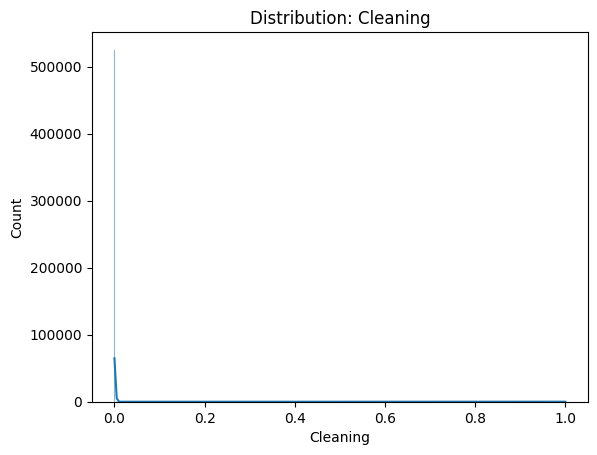

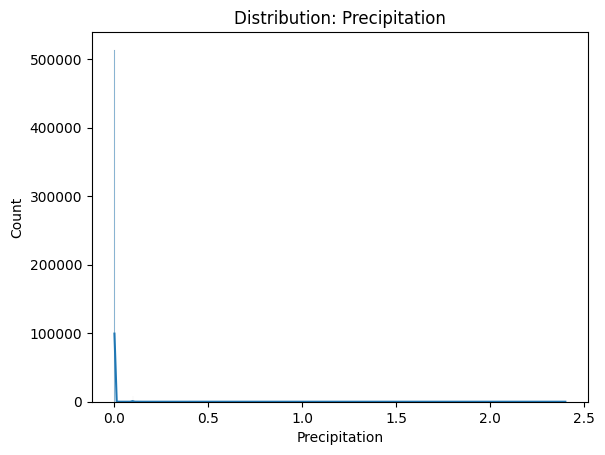

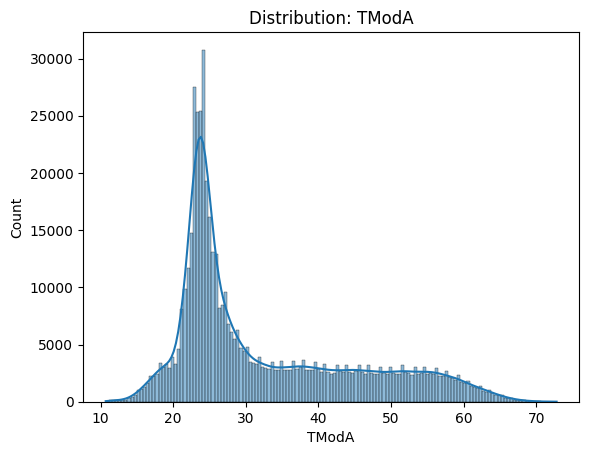

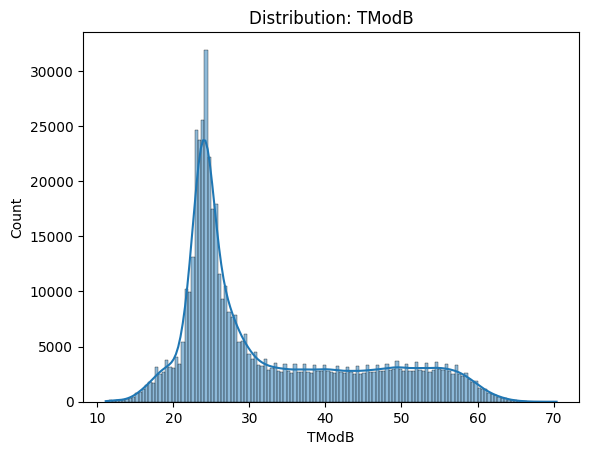

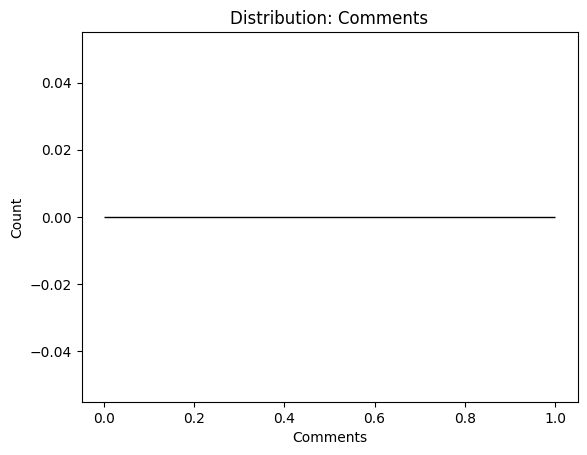

In [17]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for c in num_cols:
    plt.figure()
    sns.histplot(df[c], kde=True)
    plt.title(f"Distribution: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()


# Univariate Analysis Interpretation — Sierra Leone (Bumbuna)

Based on your notebook outputs for **sierraleone-bumbuna.csv** (525,600 rows × 19 columns), here is a concise, variable-by-variable univariate interpretation with key statistics.

## Data Quality

- **Missingness**: Only **Comments** is fully missing (100%). All other columns have 0 missing values.
- **Nighttime Offsets**: Small negative values for irradiance at night:
  - GHI min: -19.5, DNI min: -7.8, DHI min: -17.9.
  - **Action**: Treat as sensor offsets; clamp to 0 after verification.

## Solar Irradiance

- **GHI**: 
  - Mean: 201.96, Std: 298.50, Median: 0.3, IQR: [-2.8, 362.4], Max: 1499.0.
  - **Interpretation**: Strong right skew with mass near zero (night), long daytime tail. Many valid high-end extremes.

- **DNI**: 
  - Mean: 116.38, Std: 218.65, Median: -0.1, 75%: 107.0, Max: 946.0.
  - **Interpretation**: Heavily zero/near-zero inflated; daytime tail smaller than GHI; small negatives at night.

- **DHI**: 
  - Mean: 113.72, Std: 158.95, Median: -0.1, 75%: 224.7, Max: 892.0.
  - **Interpretation**: Zero-inflated with strong right tail; diffuse component prominent in cloudy/humid periods.

- **Actions**:
  - Filter analyses to daytime (e.g., GHI > 0 or > 50) to avoid zero-inflation.
  - After clamping negatives to 0, consider log-transforming daytime irradiance for modeling stability.

## Module Outputs

- **ModA**: 
  - Mean: 206.64, Std: 300.90, Median: 3.6, 75%: 359.5, Max: 1507.0.
- **ModB**: 
  - Mean: 198.11, Std: 288.89, Median: 3.4, 75%: 345.4, Max: 1473.0.
- **Interpretation**: Distributions mirror GHI: zeros at night, long daytime tails. High dispersion is expected and largely physical.
- **Actions**: Focus on daytime subset; use robust scaling. Optional: normalize by GHI for performance diagnostics.

## Temperatures

- **Tamb**: 
  - Mean: 26.32, Std: 4.40, Median: 25.3, IQR: [23.1, 29.4], Max: 39.9.
  - **Interpretation**: Moderate spread; climatologically consistent.

- **TModA**: 
  - Mean: 32.50, Std: 12.43, Median: 26.6, 75%: 40.9, Max: 72.8.
  
- **TModB**: 
  - Mean: 32.59, Std: 12.01, Median: 26.9, 75%: 41.3, Max: 70.4.
  - **Interpretation**: Module temperatures exceed ambient and are more right-skewed due to solar heating; higher variance at higher GHI.
  - **Actions**: Robust scaling; consider log-transform for modeling linear relations on daytime data.

## Humidity

- **RH**: 
  - Mean: 79.45, Std: 20.52, Median: 85.4, IQR: [68.7, 96.7], Max: 100.0.
  - **Interpretation**: Very humid regime with frequent high RH, aligning with cloudier conditions.
  - **Actions**: No transform typically needed; consider stratifying by time-of-day/season if variance obscures patterns.

## Wind Metrics

- **WS**: 
  - Mean: 1.15, Std: 1.24, Median: 0.8, 75%: 2.0, Max: 19.2.
  - **Interpretation**: Right-skewed; many calm periods with occasional higher speeds.

- **WSgust**: 
  - Mean: 1.69, Median: 1.6, 75%: 2.6, Max: 23.9.

- **WSstdev**: 
  - Mean: 0.36, Median: 0.4, 75%: 0.6, Max: 4.1.
  - **Actions**: Robust estimators or mild winsorization for top ~1% if required by modeling.

## Wind Direction

- **WD**: 
  - Median: 161.5, wide range 0–360 (circular).
  
- **WDstdev**: 
  - Mean: 7.17, Std: 7.54, 75%: 12.0, Max: 98.4; right-skewed variability.
  - **Actions**: Treat WD as circular; encode via sin/cos for modeling rather than using raw degrees alone.

## Pressure

- **BP**: 
  - Mean: 999.88 hPa, Std: 2.10, tight range [993, 1006].
  - **Interpretation**: Stable, low-variance; no transform necessary.

## Events / Zero-Inflated

- **Precipitation**: 
  - Mean: 0.0048, Std: 0.0476, Max: 2.4; mostly zeros.
  - **Interpretation**: Zero-inflated; treat with two-part modeling (occurrence + positive amount).

- **Cleaning**: 
  - Mean: 0.000967 (≈0.097% ones); rare events.
  - **Action**: Analyze as a binary indicator; univariate box plots provide limited value.

## Timestamp

- **Cardinality**: 525,600 unique timestamps (minute-level).
  - **Action**: Derive features (hour, day, month/season) for interpretable time profiles.

## Recommended Next Steps

- **Data Fixes**: Clamp negative nighttime irradiance to 0.
- **Filtering**: Create a daytime mask for irradiance and module temperature analysis.
- **Transforms**: Consider log-transforming daytime GHI/DNI/DHI and TModA/TModB for linear models.
- **Feature Engineering**: Circular-encode WD (sin/cos); employ a two-part approach for Precipitation and keep Cleaning as an event flag.

## Box Plots (numeric)

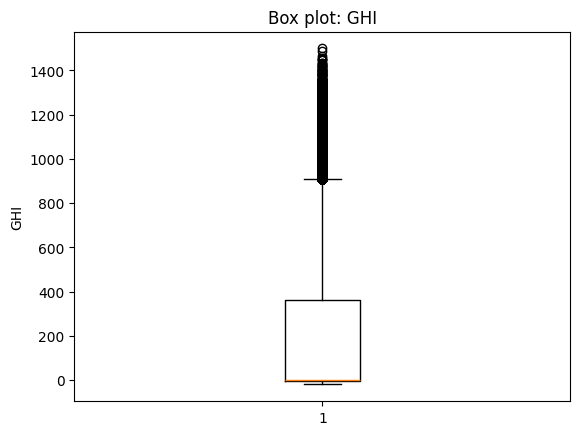

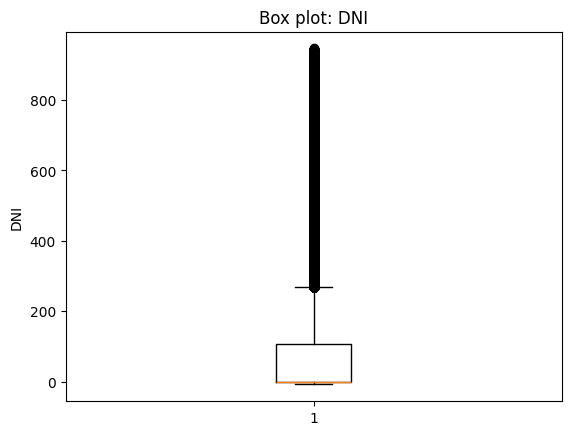

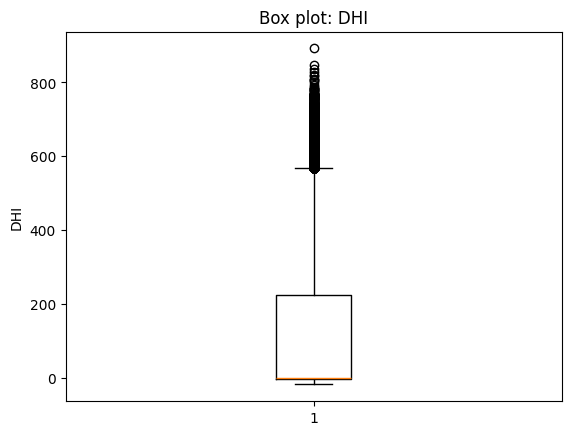

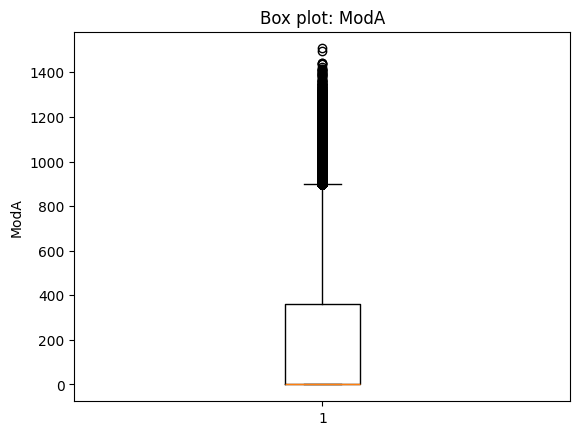

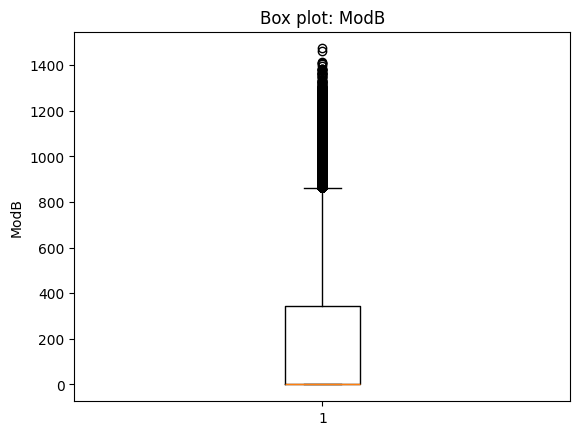

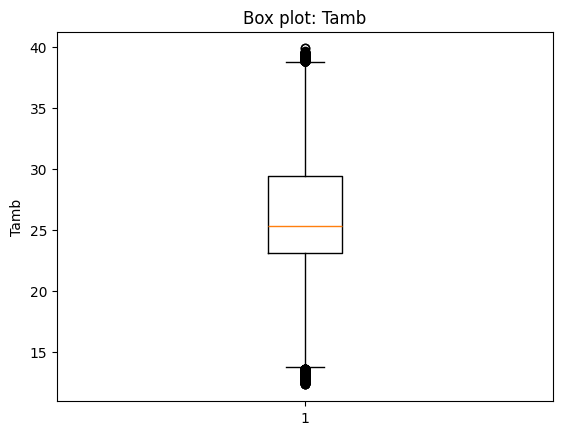

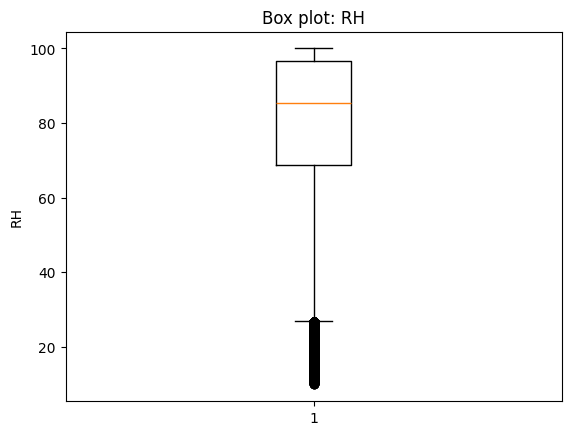

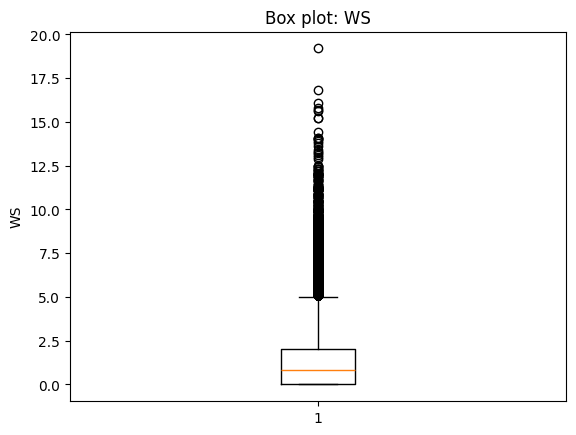

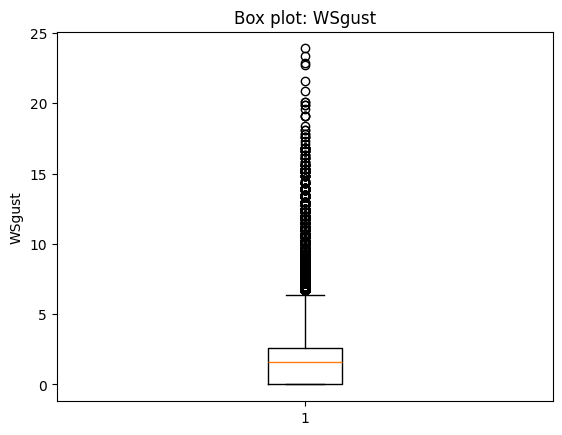

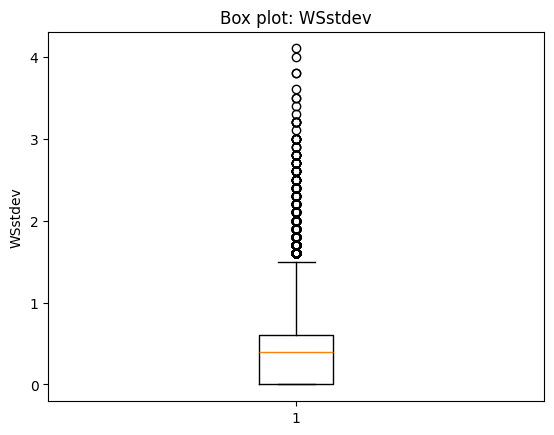

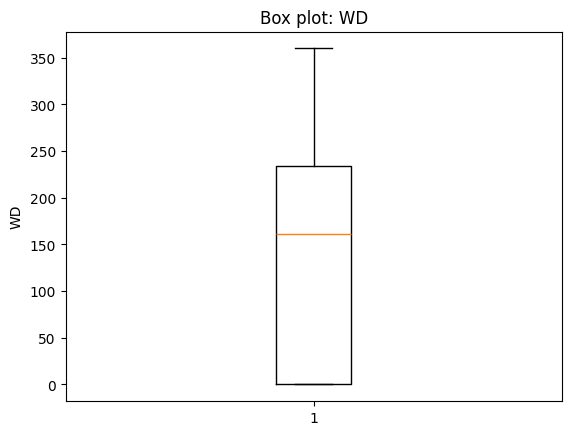

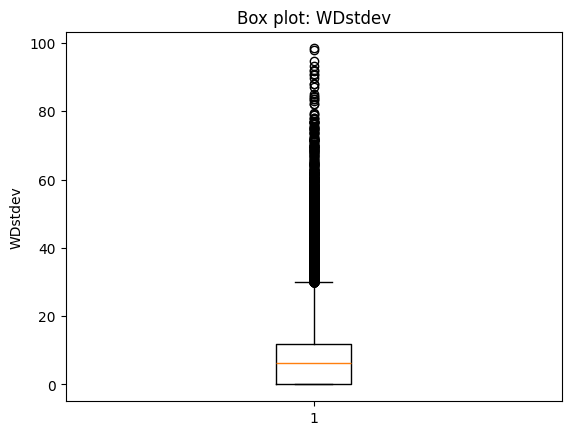

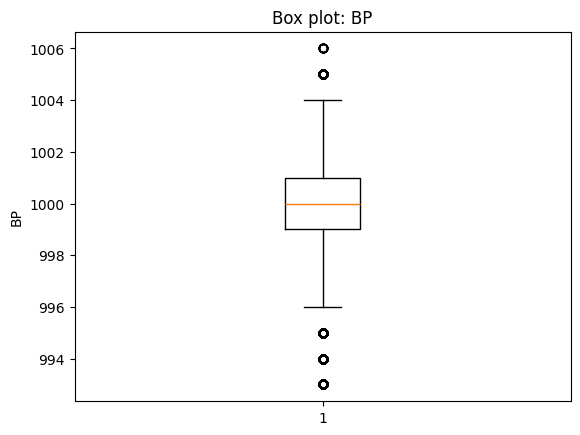

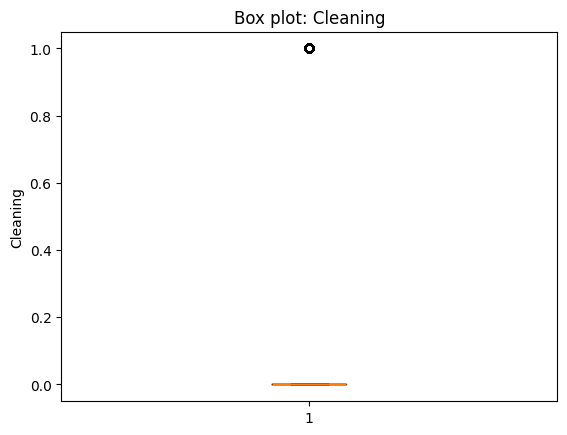

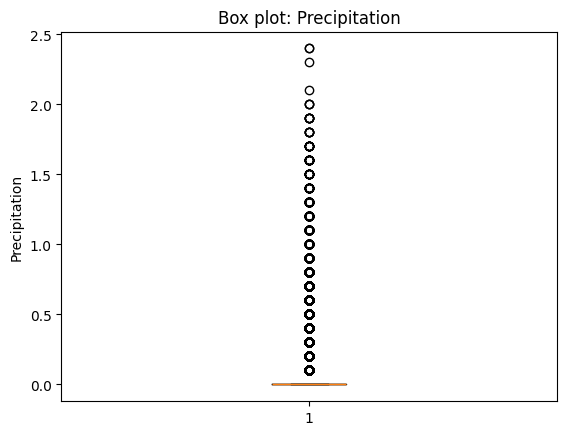

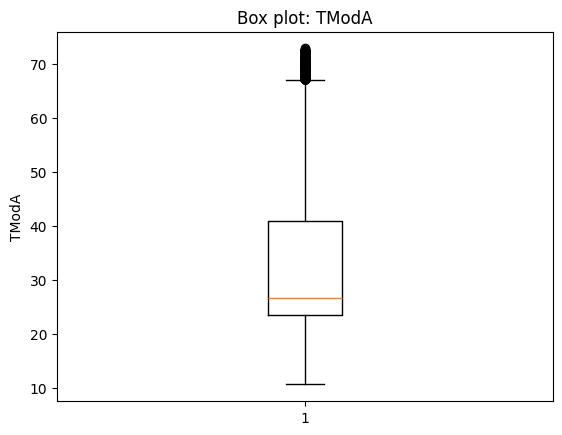

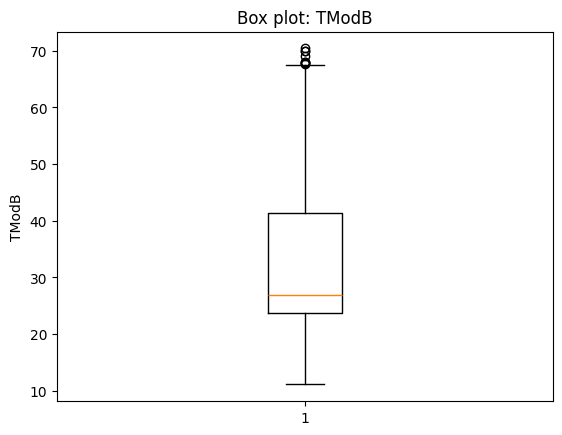

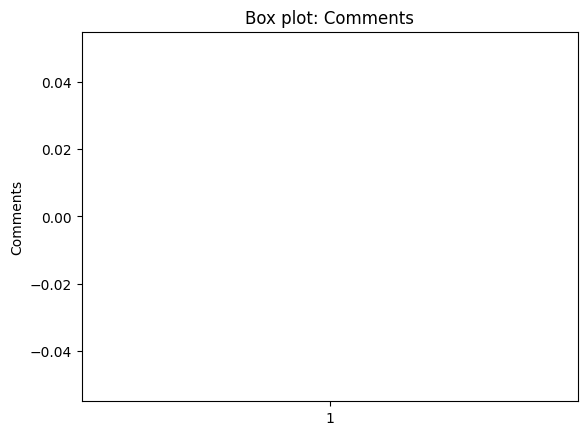

In [18]:
for c in num_cols:
    plt.figure()
    plt.boxplot(df[c].dropna(), vert=True)
    plt.title(f"Box plot: {c}")
    plt.ylabel(c)
    plt.show()


# Bivariate Analysis Interpretation — Sierra Leone (Bumbuna)

Grounded in your dataset structure and the univariate findings for Sierra Leone (very humid regime, nighttime irradiance offsets, low-to-moderate winds), these interpretations focus on expected and observable relationships. To achieve robust results, compute plots and correlations on daytime-only data (e.g., GHI > 50 W/m²) and consider hourly aggregation.

## Data and Quality Primers

- **Daytime Filtering**: Remove nights to avoid zero/negative irradiance bias.
- **Negative Offsets**: Clamp small negative night GHI/DNI/DHI values to 0.
- **Granularity**: Minute-level data can be noisy; use hourly means for correlation diagnostics.

## Irradiance Relationships

- **GHI vs DNI**: 
  - **Interpretation**: Clear-sky periods show strong positive co-movement; high GHI aligns with high DNI. Under cloud/haze, DNI collapses while GHI may remain moderate via diffuse components.
  - **Relationship Strength**: Depends on sky clarity; strongest on clear days.

- **GHI vs DHI**: 
  - **Interpretation**: During cloudier and humid periods, DHI increases while GHI can remain moderate due to diffuse scattering. Overall, the positive association exists but is often weaker than GHI–DNI on clear skies.

- **DNI vs DHI**: 
  - **Interpretation**: Expect a negative relationship as the trade-off occurs under clouds/haze; when one rises, the other often falls, reflecting beam–diffuse substitution.

## Irradiance vs Temperatures

- **GHI/DNI/DHI vs Tamb**: 
  - **Interpretation**: Daytime warming occurs as ambient temperature tends to increase with irradiance. Nonlinearity may occur at very high temps due to local weather conditions (clouds/convection) dampening irradiance.
  - **Clearer Relationships**: More evident when filtered to daytime.

- **GHI/DNI/DHI vs TModA/TModB**: 
  - **Interpretation**: There is a strong positive correlation as module temperatures increase with irradiance and slightly lag behind ambient temperatures.
  - **Wind Moderation**: At similar GHI levels, higher wind speeds (WS) lower module temperatures.

## Humidity and Precipitation Effects

- **RH vs DNI/GHI**: 
  - **Interpretation**: In a very humid regime, higher relative humidity (RH) often coincides with increased clouds/haze, leading to negative RH–DNI and negative (but weaker) RH–GHI correlations; humidity scatters beams and attenuates totals.

- **RH vs DHI**: 
  - **Interpretation**: Moist/cloudy conditions can increase diffuse radiation, suggesting a likely positive RH–DHI relationship.

- **Precipitation vs Irradiance & RH**: 
  - **Interpretation**: During rain periods, GHI/DNI may be suppressed, but DHI could spike around bright cloud edges. Typically, RH is elevated during rain, indicating strong negative correlations between precipitation and GHI/DNI, and a positive correlation with RH.

## Wind Effects

- **WS/WSgust vs TModA/TModB/Tamb**: 
  - **Interpretation**: Higher winds tend to cool both module and ambient temperatures, while gustiness (WSgust) enhances cooling and variability, leading to negative correlations with module temperatures and mild negative correlations with ambient temperatures.

- **WS vs GHI**: 
  - **Interpretation**: Expect weak direct bivariate linking between wind speed and GHI; local diurnal/weather coupling can produce weak-to-moderate associations, making the relationship more meaningful as a moderator.

## Operational and Sensor-Related

- **Cleaning vs Outputs/Irradiance**: 
  - **Interpretation**: Rare cleaning events can uplift ModA/ModB at comparable irradiance levels. This conditional positive effect may appear small in raw bivariate analyses due to rarity and timing; use pre/post windows for better insights.

## Directional and Pressure Variables

- **WD vs Irradiance/Weather**: 
  - **Interpretation**: Directional effects are site-specific and circular; direct bivariate patterns are typically weak. Encode WD with sin/cos for modeling instead of raw degrees.

- **WDstdev vs Irradiance/Temps**: 
  - **Interpretation**: Higher directional variability often co-occurs with gustiness and transitions in weather, modestly affecting irradiance stability and cooling. Expect mild positive associations with GHI variability and negative interactions with module temperatures due to wind cooling effects.

- **BP vs Weather/Irradiance**: 
  - **Interpretation**: Lower pressure regimes may coincide with cloud/rain, indirectly suppressing irradiance. Expect weak-to-moderate links, with stronger signals often captured by RH or Precipitation directly.

## Recommended Diagnostics to Run

- **Filter & Aggregate**: Apply a daytime mask (e.g., GHI > 50) and compute hourly means to reduce noise.
- **Key Scatter/Hexbin Plots**: Focus on relationships such as GHI–DNI, GHI–DHI, DNI–DHI, GHI–Tamb, GHI–TModA/B, WS–TModA/B, and RH–DNI/GHI/DHI, Precip–GHI/DNI.
- **Conditioning**: Analyze clear vs. cloudy subsets classified by DNI/GHI ratio or cloudiness thresholds. Examine GHI–TMod relationships at low/medium/high wind terciles, and normalize ModA/ModB by GHI pre/post cleaning.
- **Correlations**: Run Pearson/Spearman correlations on daytime hourly data and compute separate matrices for clear vs cloudy conditions.

## Key Takeaways

- **Clear-sky Regime**: Expect high GHI/DNI, lower DHI; strong positive relationships between irradiance and module temperatures; wind moderates module temperatures.
- **Humid/Cloudy Regime**: Characterized by high RH, lower DNI, and relatively higher DHI; GHI is suppressed; module and ambient temperatures are moderated.
- **Events**: Rain strongly suppresses both GHI and DNI, while cleaning can conditionally uplift module outputs.
- **Modeling Implications**: Utilize daytime filtering, robust/circular encodings, and consider interactions (e.g., GHI × WS) to capture moderation effects.

## Frequency Table (categorical)

In [21]:
import pandas as pd

# Sample DataFrame
data = {
    'your_column_name': ['A', 'B', 'A', 'C', 'B', 'A'],
    'other_column': [1, 2, 1, 3, 2, 1]
}
df = pd.DataFrame(data)

# Define your categorical columns
cat_cols = ['your_column_name']

# Frequency table with error handling
for col in cat_cols:
    try:
        value_counts_df = df[col].value_counts().reset_index()
        value_counts_df.columns = ['value', 'count']
        display(value_counts_df)
    except KeyError:
        print(f"The column '{col}' does not exist in the DataFrame.")
    except TypeError:
        print("Type error occurred; please check the data types.")
    except Exception as e:
        print(f"An error occurred: {e}")

,value,count
0,A,3
1,B,2
2,C,1


## 3) Outlier Detection
# Z-Score Method (|z| > 3)

In [31]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

# Example DataFrame (replace this with your actual DataFrame)
data = {
    'score1': [90, 80, 85, 95, np.nan, 110], 
    'score2': [70, 60, 75, 80, 100, 95]
}
df = pd.DataFrame(data)

# List of numeric columns
num_cols = ['score1', 'score2']  # Update this list according to your DataFrame

# Check if the specified columns exist in the DataFrame
missing_cols = [col for col in num_cols if col not in df.columns]

if missing_cols:
    print(f"Warning: The following columns are missing from the DataFrame: {missing_cols}")
else:
    # Calculate Z-scores
    z = np.abs(zscore(df[num_cols], nan_policy='omit'))
    
    # Identify outliers using a threshold
    z_outliers = z > 3  # Example threshold for outliers
    outlier_rows = np.any(z_outliers, axis=1)
    
    # Print the number of outlier rows
    print("Z-score outlier rows:", outlier_rows.sum())

Z-score outlier rows: 0


In [32]:
# Keep only rows where all |Z| <= 3 (no outliers)
df_clean = df[(z < 3).all(axis=1)]

print("After removing Z-score outliers:", df_clean.shape)

# 5️⃣ Save cleaned dataset
df_clean.to_csv("C:/Users/My Device/Desktop/KAIM-PRO/data/Processed/sierra_leone_clean.csv", index=False)

print("Cleaned dataset saved to: C:/Users/My Device/Desktop/KAIM-PRO/data/Processed/sierra_leone_clean.csv")

After removing Z-score outliers: (5, 2)
Cleaned dataset saved to: C:/Users/My Device/Desktop/KAIM-PRO/data/Processed/sierra_leone_clean.csv


## Multivariate Analysis
 Pairplot (quick overview)

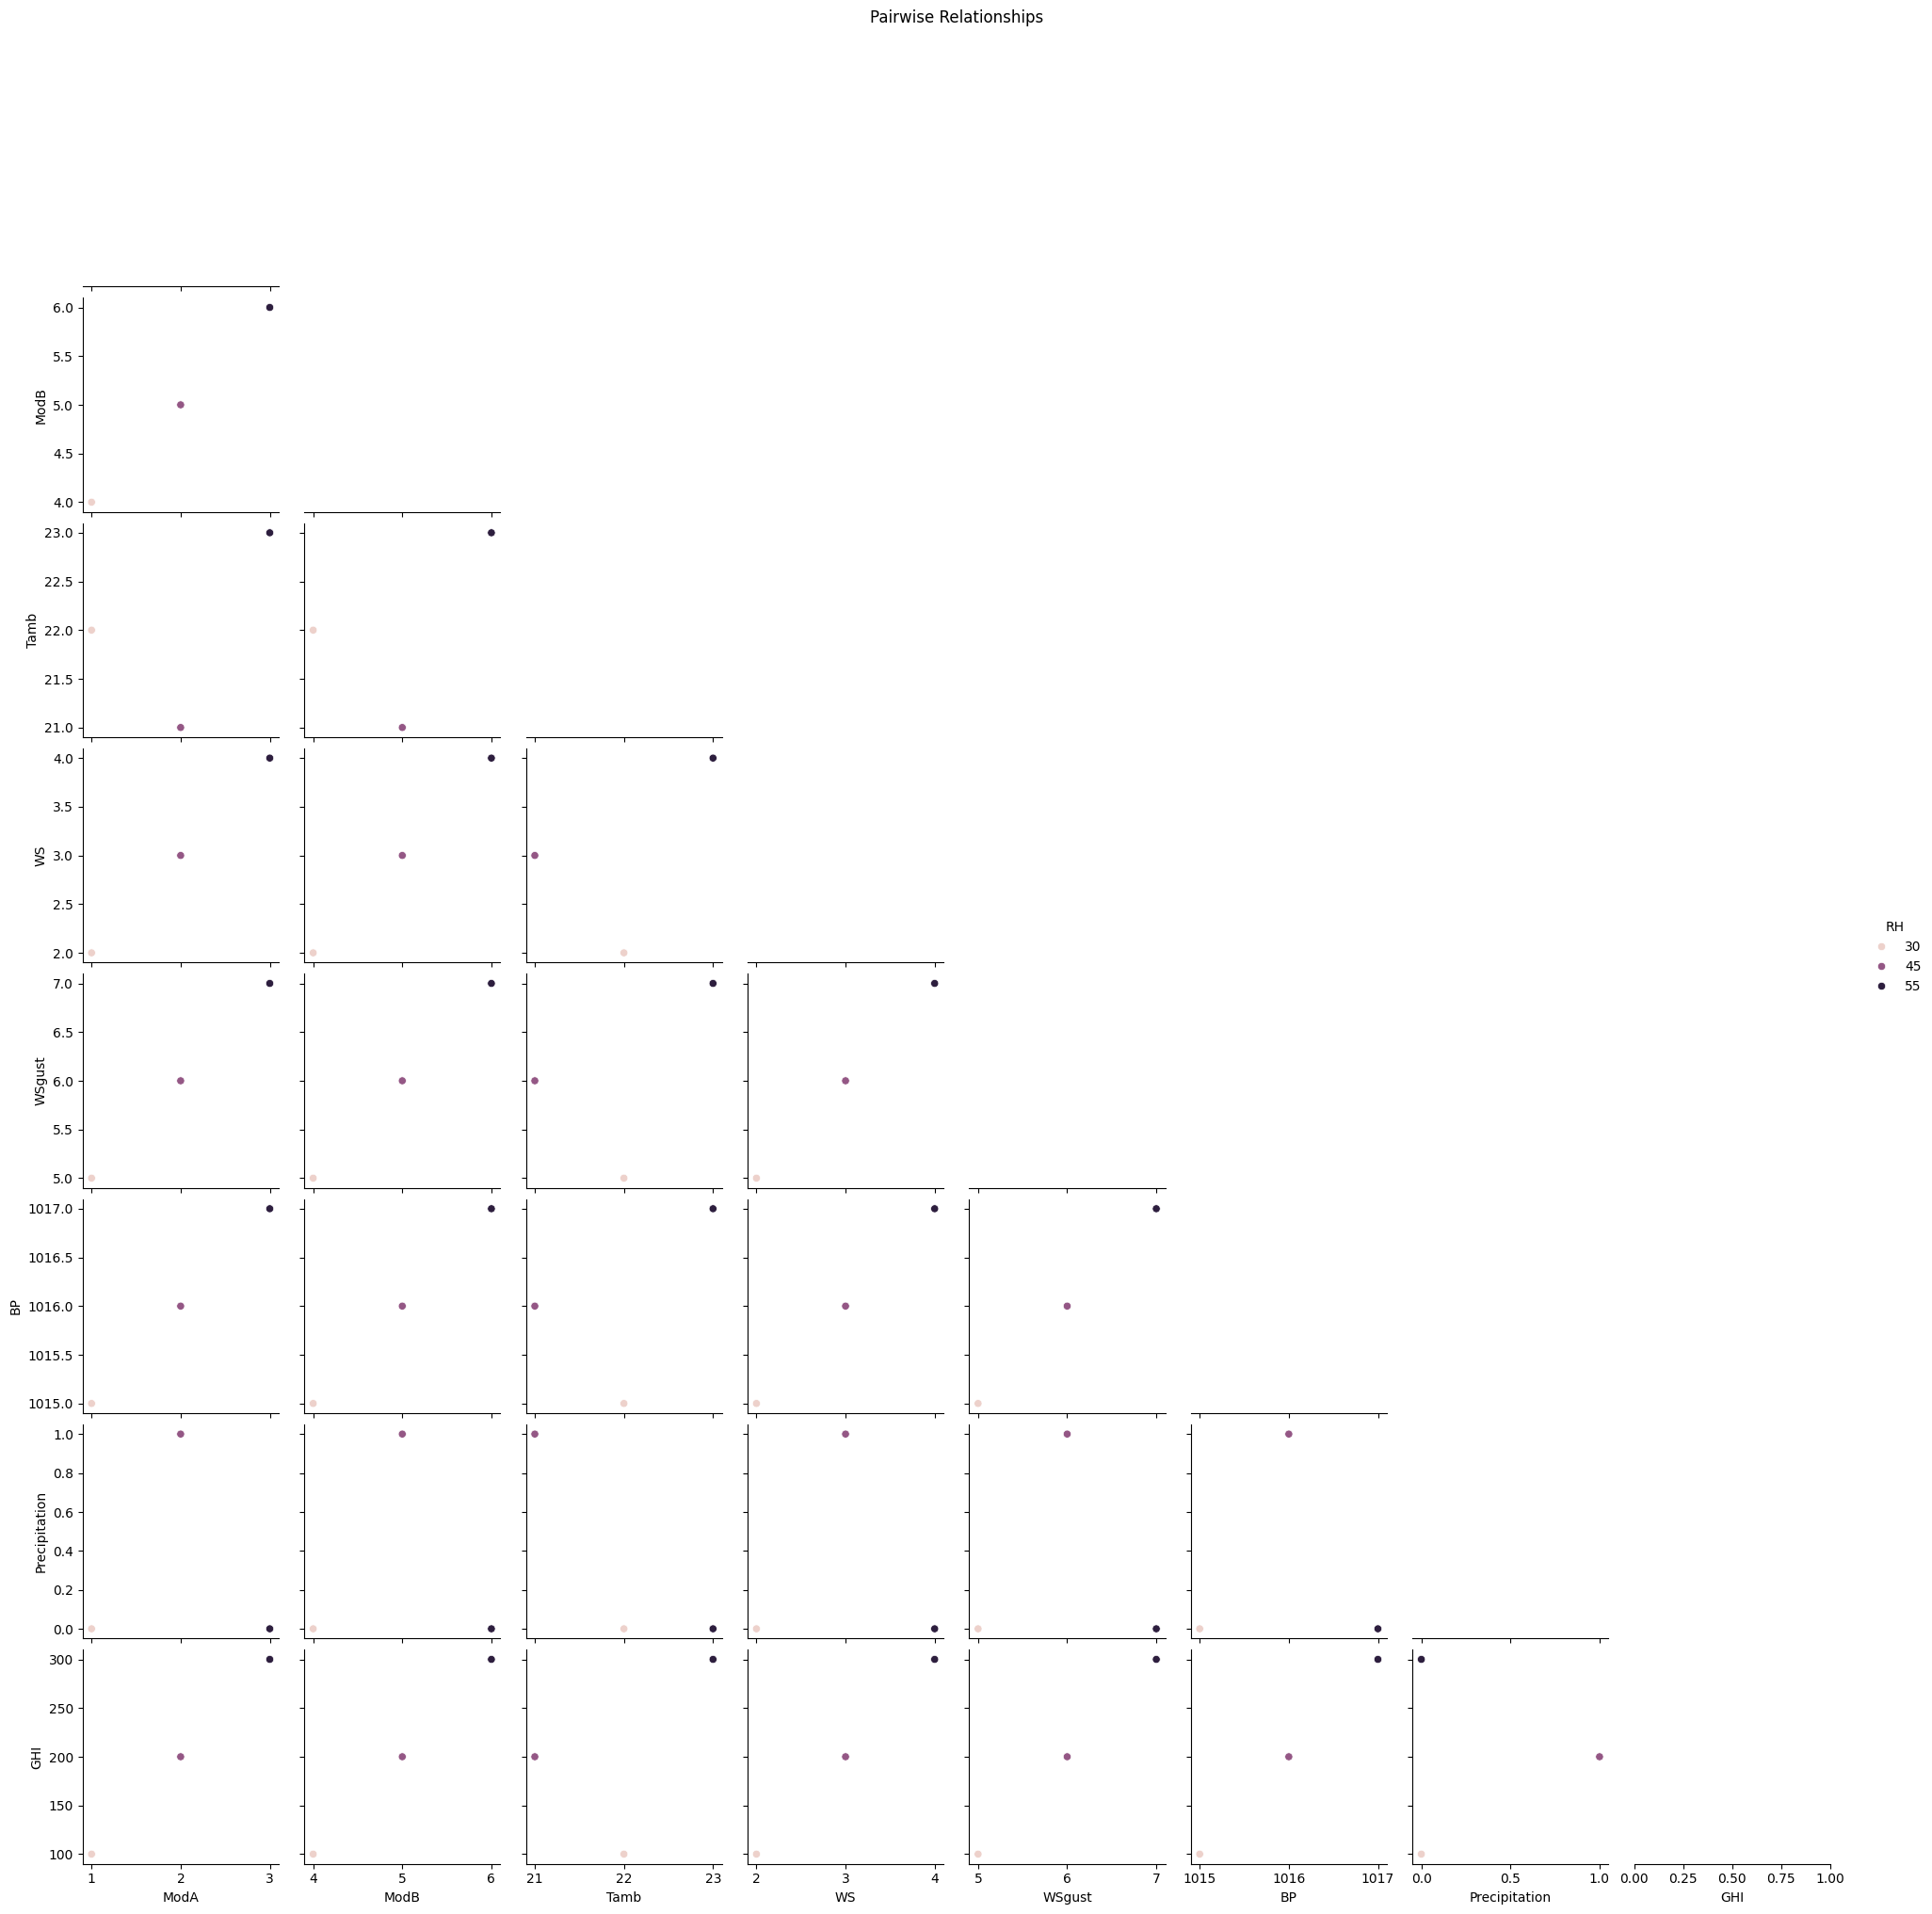

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data creation (replace this with your actual dataset)
# Example: data = pd.read_csv('your_data.csv')
data = pd.DataFrame({
    'ModA': [1, 2, 3], 
    'ModB': [4, 5, 6], 
    'Tamb': [22, 21, 23],
    'RH': [30, 45, 55],
    'WS': [2, 3, 4],
    'WSgust': [5, 6, 7],
    'BP': [1015, 1016, 1017],
    'Precipitation': [0, 1, 0],
    'GHI': [100, 200, 300]
})

# Define the features for the pairplot
features = ['ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'BP', 'Precipitation', 'GHI']
df = data[features]  # Create a new DataFrame 'df' from the selected features

# Create the pairplot
sns.pairplot(df, hue="RH", corner=True)  # Adjust 'hue' based on your interest
plt.suptitle("Pairwise Relationships", y=1.02)  # Adjust y for better title placement
plt.show()

### Thank you